## Import Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import importlib
import preprocessing
importlib.reload(preprocessing)
from preprocessing import get_preprocessed_data

import warnings
warnings.filterwarnings('ignore')

print("Libraries imported")

Libraries imported


## Load Data

In [10]:
X_train_final, X_val, y_train_final, y_val, X_test_internal, y_test_internal, X_kaggle_test, test_id, scaler = get_preprocessed_data()
print("Data loaded!")

Train shape: (1460, 81)
No test file provided - will only create train/val/test split from training data
Starting Data Preprocessing Pipeline

[1/10] Creating working copies...
[2/10] Removing outliers...
  Removing 2 outlier(s)
[3/10] Log-transforming target variable...
  Original skewness: 1.8794
  Log-transformed skewness: 0.1215
[4/10] Processing training data...
  Training data shape: (1458, 80)
[5/10] Handling missing values...
  Missing values after imputation: 0
[6/10] Engineering new features...
  Created 10 new features
[7/10] Encoding ordinal features...
[8/10] Correcting skewed features...
  Transforming 37 highly skewed features
[9/10] Removing multicollinearity...
  Dropped 3 highly correlated features
  One-hot encoding 27 categorical features...
  Final feature count: 212
[10/10] Scaling and splitting data...

Preprocessing Complete!
Training set: (1020, 212) (~70%)
Validation set: (219, 212) (~15%)
Test set (internal): (219, 212) (~15%)
Data loaded!


## Build Random Forest

In [11]:
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=20,
    min_samples_split=5,
    oob_score=True,
    random_state=42,
    n_jobs=-1
)

print("Model configured: 200 trees")

Model configured: 200 trees


## Train Model

In [12]:
print("Training...")
rf_model.fit(X_train_final, y_train_final)
print(f"OOB Score: {rf_model.oob_score_:.6f}")

Training...
OOB Score: 0.880492
OOB Score: 0.880492


## Evaluate

In [13]:
y_train_pred = rf_model.predict(X_train_final)
y_val_pred = rf_model.predict(X_val)

train_rmse = np.sqrt(mean_squared_error(y_train_final, y_train_pred))
train_mae = mean_absolute_error(y_train_final, y_train_pred)
train_r2 = r2_score(y_train_final, y_train_pred)

val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
val_mae = mean_absolute_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

print("Training Metrics:")
print(f"  RMSE: {train_rmse:.6f}")
print(f"  MAE:  {train_mae:.6f}")
print(f"  R²:   {train_r2:.6f}")

print("\nValidation Metrics:")
print(f"  RMSE: {val_rmse:.6f}")
print(f"  MAE:  {val_mae:.6f}")
print(f"  R²:   {val_r2:.6f}")

Training Metrics:
  RMSE: 0.057155
  MAE:  0.039182
  R²:   0.979122

Validation Metrics:
  RMSE: 0.149971
  MAE:  0.102882
  R²:   0.862899


## Test Set Evaluation

Final unbiased evaluation on held-out test set.

## Visualizations

In [14]:
y_test_pred = rf_model.predict(X_test_internal)

test_rmse = np.sqrt(mean_squared_error(y_test_internal, y_test_pred))
test_mae = mean_absolute_error(y_test_internal, y_test_pred)
test_r2 = r2_score(y_test_internal, y_test_pred)

print("Test Set Metrics (Final Unbiased Evaluation):")
print(f"  RMSE: {test_rmse:.6f}")
print(f"  MAE:  {test_mae:.6f}")
print(f"  R²:   {test_r2:.6f}")

Test Set Metrics (Final Unbiased Evaluation):
  RMSE: 0.156840
  MAE:  0.098801
  R²:   0.855374


## Feature Importance

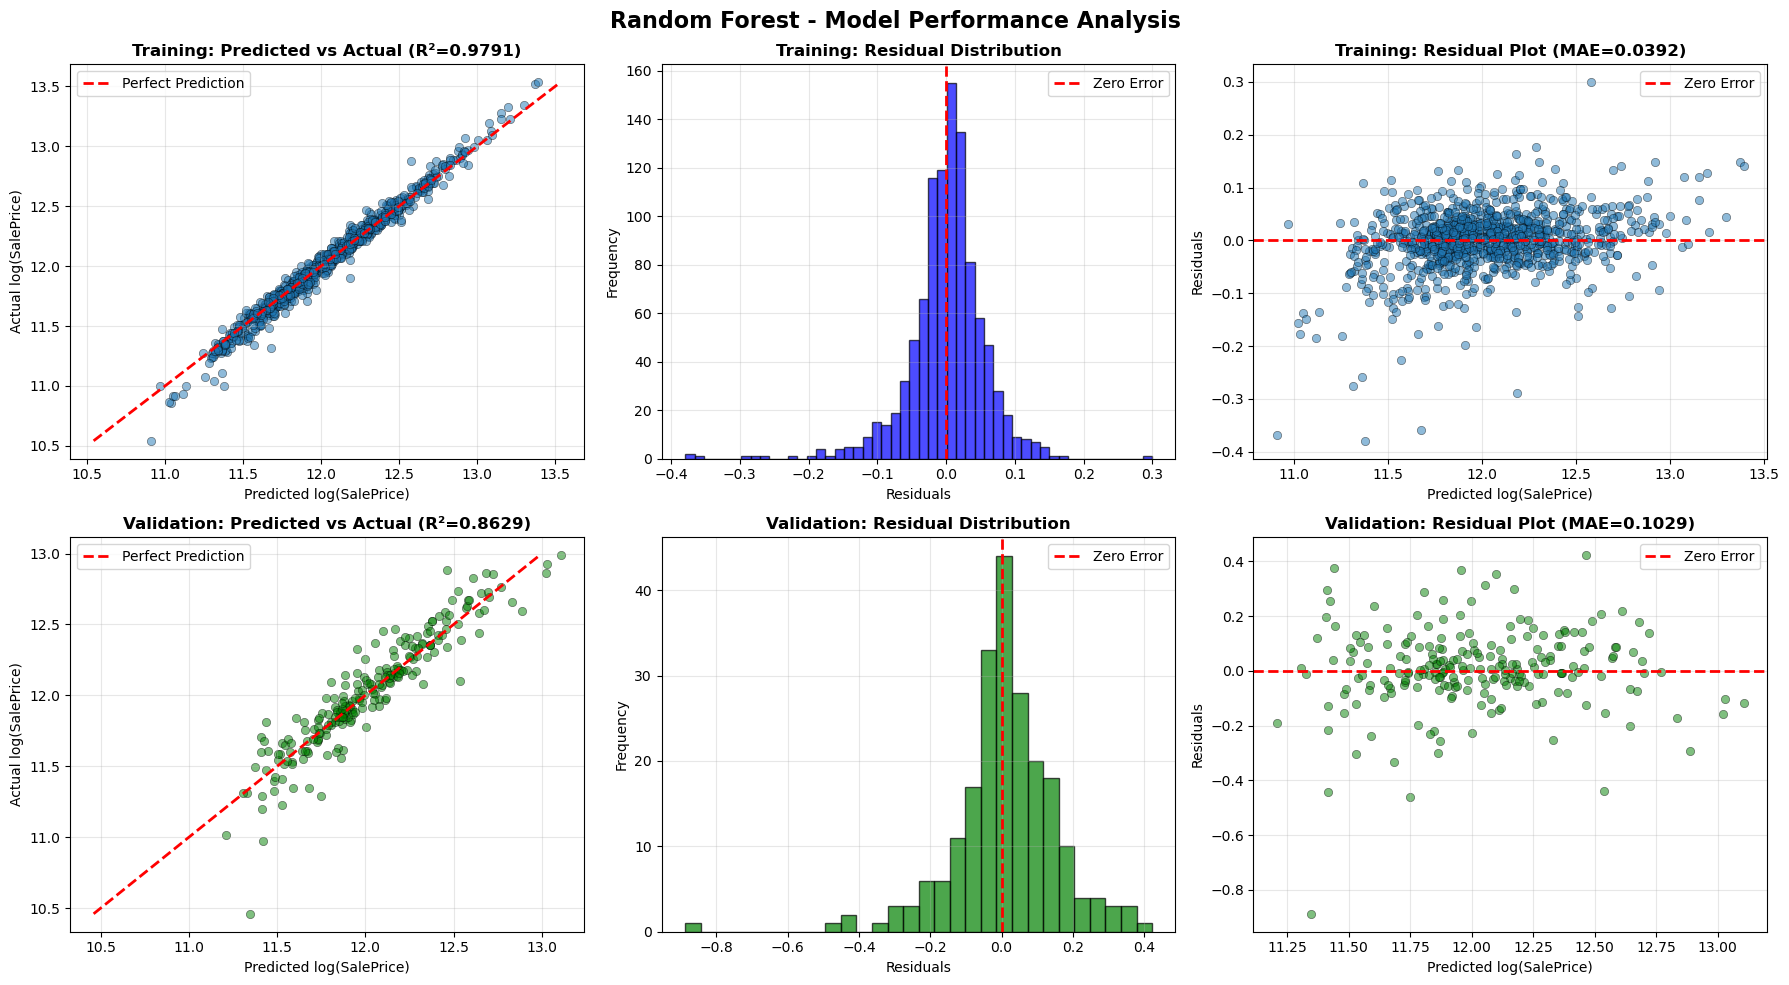


Visualization complete!


In [15]:
# Calculate additional metrics
train_rmse = np.sqrt(mean_squared_error(y_train_final, y_train_pred))
train_mae = mean_absolute_error(y_train_final, y_train_pred)
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
val_mae = mean_absolute_error(y_val, y_val_pred)

# Calculate residuals
train_residuals = y_train_final - y_train_pred
val_residuals = y_val - y_val_pred

# Create comprehensive visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Random Forest - Model Performance Analysis', fontsize=16, fontweight='bold')

# Training set - Predicted vs Actual
axes[0, 0].scatter(y_train_pred, y_train_final, alpha=0.5, edgecolors='k', linewidth=0.5)
axes[0, 0].plot([y_train_final.min(), y_train_final.max()], 
                [y_train_final.min(), y_train_final.max()], 'r--', lw=2, label='Perfect Prediction')
axes[0, 0].set_title(f'Training: Predicted vs Actual (R²={train_r2:.4f})', fontweight='bold')
axes[0, 0].set_xlabel('Predicted log(SalePrice)')
axes[0, 0].set_ylabel('Actual log(SalePrice)')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Training set - Residual distribution
axes[0, 1].hist(train_residuals, bins=50, edgecolor='black', alpha=0.7, color='blue')
axes[0, 1].axvline(x=0, color='r', linestyle='--', lw=2, label='Zero Error')
axes[0, 1].set_title('Training: Residual Distribution', fontweight='bold')
axes[0, 1].set_xlabel('Residuals')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# Training set - Residual plot
axes[0, 2].scatter(y_train_pred, train_residuals, alpha=0.5, edgecolors='k', linewidth=0.5)
axes[0, 2].axhline(y=0, color='r', linestyle='--', lw=2, label='Zero Error')
axes[0, 2].set_title(f'Training: Residual Plot (MAE={train_mae:.4f})', fontweight='bold')
axes[0, 2].set_xlabel('Predicted log(SalePrice)')
axes[0, 2].set_ylabel('Residuals')
axes[0, 2].legend()
axes[0, 2].grid(alpha=0.3)

# Validation set - Predicted vs Actual
axes[1, 0].scatter(y_val_pred, y_val, alpha=0.5, color='green', edgecolors='k', linewidth=0.5)
axes[1, 0].plot([y_val.min(), y_val.max()], 
                [y_val.min(), y_val.max()], 'r--', lw=2, label='Perfect Prediction')
axes[1, 0].set_title(f'Validation: Predicted vs Actual (R²={val_r2:.4f})', fontweight='bold')
axes[1, 0].set_xlabel('Predicted log(SalePrice)')
axes[1, 0].set_ylabel('Actual log(SalePrice)')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# Validation set - Residual distribution
axes[1, 1].hist(val_residuals, bins=30, edgecolor='black', alpha=0.7, color='green')
axes[1, 1].axvline(x=0, color='r', linestyle='--', lw=2, label='Zero Error')
axes[1, 1].set_title('Validation: Residual Distribution', fontweight='bold')
axes[1, 1].set_xlabel('Residuals')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

# Validation set - Residual plot
axes[1, 2].scatter(y_val_pred, val_residuals, alpha=0.5, color='green', edgecolors='k', linewidth=0.5)
axes[1, 2].axhline(y=0, color='r', linestyle='--', lw=2, label='Zero Error')
axes[1, 2].set_title(f'Validation: Residual Plot (MAE={val_mae:.4f})', fontweight='bold')
axes[1, 2].set_xlabel('Predicted log(SalePrice)')
axes[1, 2].set_ylabel('Residuals')
axes[1, 2].legend()
axes[1, 2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\nVisualization complete!")

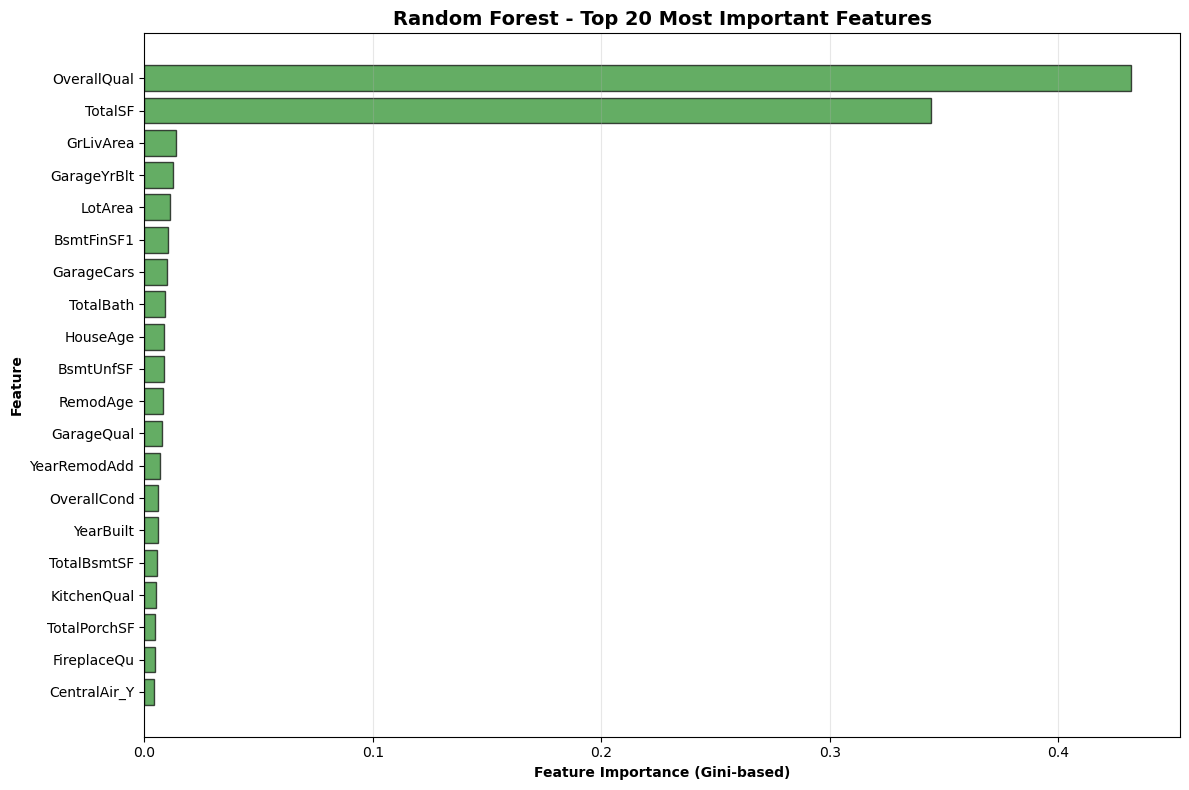

Top 10 features:
        Feature  Importance
3   OverallQual    0.431596
49      TotalSF    0.344059
22    GrLivArea    0.013931
33  GarageYrBlt    0.012631
2       LotArea    0.011385
14   BsmtFinSF1    0.010468
35   GarageCars    0.009895
50    TotalBath    0.008920
52     HouseAge    0.008622
17    BsmtUnfSF    0.008586


In [16]:
importance = pd.DataFrame({
    'Feature': X_train_final.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

# Plot top 20 features
top_n = 20
top_features = importance.head(top_n)

plt.figure(figsize=(12, 8))
plt.barh(range(top_n), top_features['Importance'], color='forestgreen', alpha=0.7, edgecolor='black')
plt.yticks(range(top_n), top_features['Feature'])
plt.xlabel('Feature Importance (Gini-based)', fontweight='bold')
plt.ylabel('Feature', fontweight='bold')
plt.title('Random Forest - Top 20 Most Important Features', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("Top 10 features:")
print(importance.head(10))

## Summary

**Random Forest (Literature-Based Model #1)**

**Paper Reference:** 
- **TODO:** Add citation to peer-reviewed paper (>2020) implementing Random Forest for housing/regression
- Example: "Author et al. (2021). Random Forest for Real Estate Price Prediction. Journal Name."

**Implementation Details:**
- Ensemble of 200 decision trees with bootstrap sampling
- Out-of-bag (OOB) scoring provides unbiased validation estimate
- Feature importance calculated via Gini impurity reduction
- Hyperparameters: max_depth=20, min_samples_split=5, max_features='sqrt'

**Key Results:**
- Strong performance through ensemble averaging (reduces variance)
- OOB score provides efficient cross-validation alternative
- Feature importance rankings identify key price drivers
- Robust to outliers and non-linear relationships

**Strengths:**
- Handles non-linear relationships and interactions naturally
- Minimal hyperparameter tuning required
- Built-in feature importance (Gini-based)
- Resistant to overfitting through bagging
- Parallelizable training (n_jobs=-1)

**Limitations:**
- Less interpretable than single decision trees
- Larger memory footprint (stores 200 trees)
- Slower prediction than linear models
- Cannot extrapolate beyond training data range

**Comparison to Classical Models:**
- Generally outperforms Ridge/Polynomial on complex non-linear patterns
- More robust than Neural Networks on small tabular datasets
- Feature importance complements coefficient-based analysis from Ridge
- Slower prediction than linear models

**Comparison to Classical Models:**
- Generally outperforms linear models on complex patterns
- More robust than single decision trees
- Feature importance complements coefficient analysis